## Implementation on Real World Dataset

For implementation, we will use same Advertising dataset.

A popular introductory statistics book, [An Introduction to Statistical Learning](https://www.statlearning.com/resources-second-edition), provides this dataset on their website. This dataset can be downloaded from the following address:
  * https://www.statlearning.com/s/Advertising.csv

This dataset has got three inputs as advertising mediums, i.e. _TV_, _radio_ and _newspaper_. Similarly the output variable is _sales_. This is a sales prediction problem with investment in any of the advertising mediums. 




## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt


In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The first plot shows a sharp upward trend in the number of units sold as TV advertising increases. A similar trend is also found as radio advertising increases. However, in the last plot, there does not appear to be a relationship between newspaper advertising and the number of units sold.

## Multiple Linear regression using Ordinary Least Squares

In [3]:
X = data_df[["TV", "radio"]]
Y = data_df[["sales"]]

In [6]:
X = np.c_[ np.ones((len(X), 1)), X ]

In [8]:
X_t = X.T

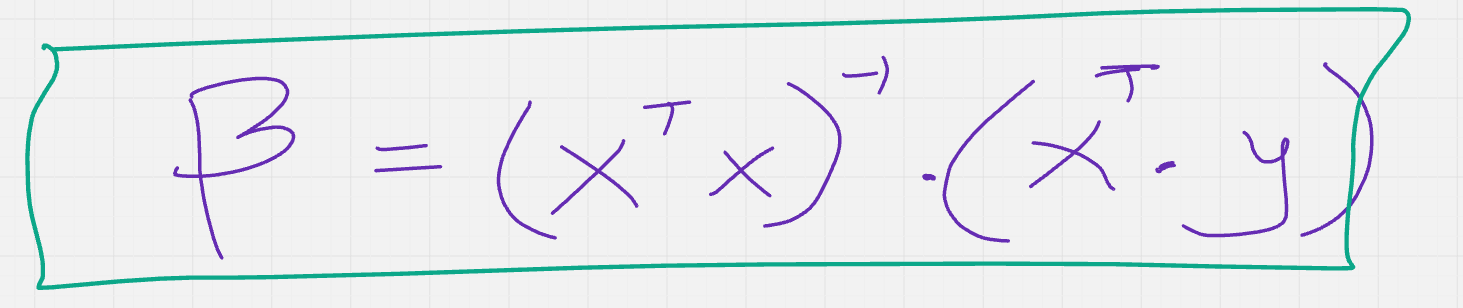

In [10]:
betas =  np.linalg.inv(X_t.dot(X)).dot(X_t).dot(Y)

In [11]:
betas

array([[2.92109991],
       [0.04575482],
       [0.18799423]])

In [12]:
print(f"y = {betas[0]} + {betas[1]}x_1 + {betas[2]}x_2")

y = [2.92109991] + [0.04575482]x_1 + [0.18799423]x_2


## Potential Issues with Ordinary Least Squares

While calculating 𝛽 , we assume that (𝐗𝑇.𝐗)−1 exists. When doesn't it exist?

The inverse doesn't exist when the matrix, 𝐗𝑇.𝐗, is not a full rank matrix. The matrix 𝐗 with dimension
𝑛 × (𝑑 + 1) should have at least (𝑑 + 1) linearly independent rows to make 𝐗𝑇 𝐗 a full rank matrix. 

If there is perfect colinearity between any two independent input variables, then the matrix doesn't become
full rank and the issues arise. There should be correlation between dependent(output) and
independent(input) variable but the independent variables should be independent of each other.